In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/train for horses.csv')

In [ ]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [ ]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [ ]:
df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [ ]:
df['outcome'] = df['outcome'].replace('euthanized', 'died')
df['outcome'] = df['outcome'].replace('euthanized', False)
df['outcome'] = df['outcome'].replace('died', False)
df['outcome'] = df['outcome'].replace('lived', True)
df['abdomen'] = df['abdomen'].str.replace('distend_', '')





In [ ]:
df['mucous_membrane'] = df['mucous_membrane'].str.replace(r'^.*_', '')
# Filter rows that do not contain "distend_"
df = df[~df['abdomen'].str.contains('distend_')]


KeyError: ignored

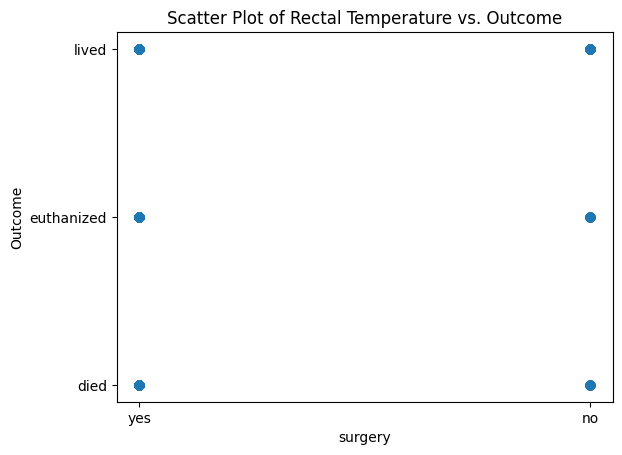

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['surgery'], df['outcome'])
plt.xlabel('surgery')
plt.ylabel('Outcome')
plt.title('Scatter Plot of Rectal Temperature vs. Outcome')
plt.show()


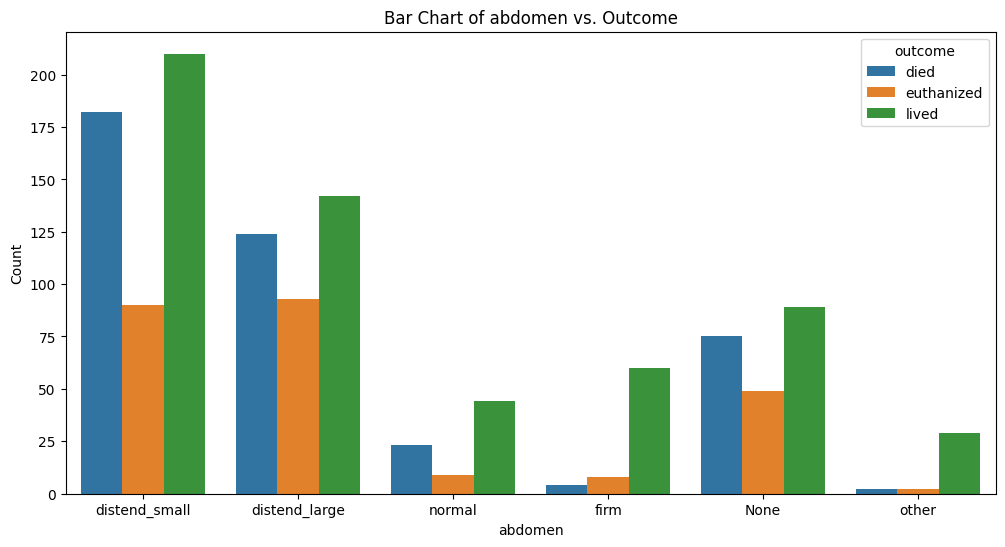

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='abdomen', hue='outcome', data=df)
plt.xlabel('abdomen')
plt.ylabel('Count')
plt.title('Bar Chart of abdomen vs. Outcome')
plt.show()


<ipython-input-5-30f2a1677943>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


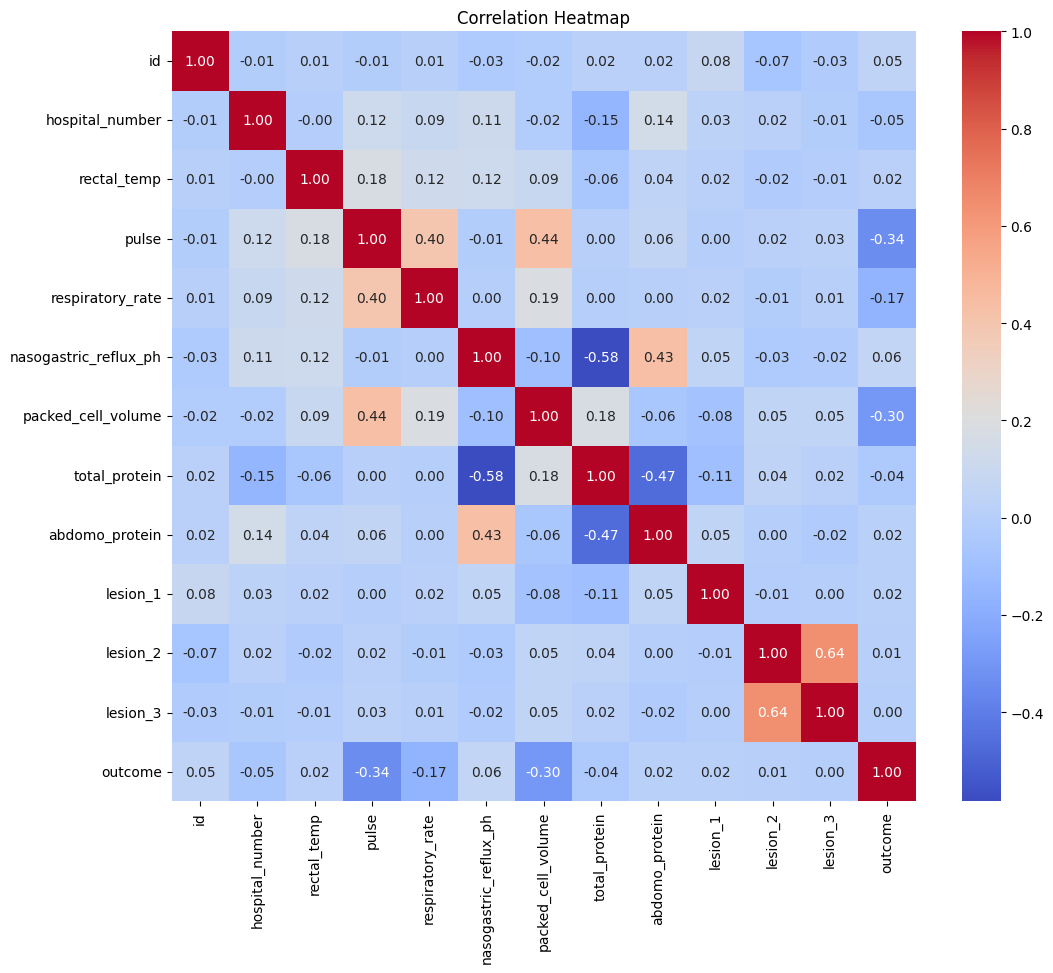

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the dataset
# Let's create a correlation matrix
correlation_matrix = df.corr()

# Include 'outcome' in the correlation matrix if it's binary (0 and 1)
# Assuming 'outcome' is already encoded, you can add it to the correlation matrix
# Example:
# correlation_matrix['outcome'] = df['outcome']

# Create a figure and axes for the heatmap
plt.figure(figsize=(12, 10))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your CSV file is named 'your_dataset.csv'


# Separate features and target variable
X = df.drop(columns=['id', 'outcome'])
y = df['outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameter grids for grid search
models = {
    'RandomForest': (RandomForestClassifier(),
                     {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GradientBoosting': (GradientBoostingClassifier(),
                         {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LogisticRegression': (LogisticRegression(),
                           {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})
}

# Perform grid search for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Store results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_accuracy': grid_search.best_score_,
        'test_accuracy': accuracy_score(y_test, grid_search.predict(X_test))
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Cross-Validation Accuracy: {result['best_accuracy']:.4f}")
    print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    print("\n")


ValueError: ignored

In [ ]:
# Example one-hot encoding for categorical columns
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your CSV file is named 'your_dataset.csv'


# Drop non-numeric columns or encode them as needed
df = pd.get_dummies(df)

# Separate features and target variable
X = df.drop(columns=['id', 'outcome'])
y = df['outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameter grids for grid search
models = {
    'RandomForest': (RandomForestClassifier(),
                     {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GradientBoosting': (GradientBoostingClassifier(),
                         {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LogisticRegression': (LogisticRegression(),
                           {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})
}

# Perform grid search for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Store results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_accuracy': grid_search.best_score_,
        'test_accuracy': accuracy_score(y_test, grid_search.predict(X_test))
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Cross-Validation Accuracy: {result['best_accuracy']:.4f}")
    print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    print("\n")


KeyError: ignored